## Introduction
This is a live *IPython notebook*. You can write and test code, annotate it with text (including equations $\hat x = \frac{1}{n}\sum_{i=0}^n x_i$), plot graphs and start external processes. You can even edit this introduction (try double-clicking on this text). 

A large number of scientific and data processing libraries are available in this environment; some of these are demoed below.

Code appears on a gray background; text annotations on a white background. The currently selected cell (if any) has an outline drawn around it. Code blocks can be run by clicking on them to select, and then pressing SHIFT-ENTER to run the cell. Any output will be printed below:

    In[1]: print "Hello, world!"
    
    Out[1]: Hello, world!





## Getting started
There are some warm ups below, covering Python itself, IPython features such as LaTeX markup, numerical computing with Numpy and Scipy, data processing with pandas, plotting with matplotlib and machine learning with sklearn, and even using Cython for high-performance computation.


## Markdown
The text inside these boxes is [Markdown](http://daringfireball.net/projects/markdown/syntax). You can create your own Markdown cells by creating a new cell (*Insert/Below Current*) and then selection *Cell/Cell Type/Markdown* (or you can hit Shift-Enter (create new cell) and ESC-M (convert to markdown) to get the same effect). This allows formatted rich text, such as *italics*, **bolding**, 
### headers
#### of
##### different sizes

bulleted lists (note the space before the * in the source!)
 * One
 * Two
 * Three
 
And also verbatim code; to enter code, insert a blank line, and then indent the code with TAB:
 
     print "hello world"
     
Inline verbatim can be created using backquotes around text, such as `x = x + 1`

IPython will also recognise LaTeX formulae if you surround them with dollar symbols \$ \$:
$ x = x + 1 $
And you can make display equations using double dollar signs:
$$ \sum_{i=0}^{N} i^{\alpha_i} + \beta_i $$


## Some IPython
IPython extends Python with "magic commands". These are command beginning with %: for example changing the current directory:

     %cd /some/path
 
A useful magic command enables figures to be drawn inline in the notebook (rather than opening as separate windows). To do this use

      %matplotlib inline

In [5]:
%matplotlib inline


## Basic python
Let's compute the length of a path in the [Collatz](http://en.wikipedia.org/wiki/Collatz_conjecture) sequence. That is, we take a number $n$ and halve it if $n \equiv 0 \mod 2$, otherwise replace it with $3n+1$. We count the number of steps until we reach 1. 

Remember that to execute the cell, and thus to define the function, select the cell and press SHIFT-ENTER.

In [6]:
def collatz(n, steps=0):
    """Compute the number of steps to reach 1 in the Collatz sequence.
    Note the use of triple quotes to specify a docstring.
    
    Also note the use of a default parameter (steps) to count the number 
    of recursive calls."""
    if n==1:
        return steps
    if n%2==0:
        return collatz(n/2, steps+1)
    else:
        return collatz(3*n+1, steps+1)

Now try it in the cell below (e.g. entering *collatz(331)* and pressing SHIFT-ENTER should print 24).

In [7]:
collatz(331)

24

OK, let's plot the graph of this function for various $n$. We'll use numpy to manipulate vectors of values, and matplotlib to plot the graph. First we must import them. In future workbooks this will already be done at the start, but we do it explicitly here for clarity.

In [19]:
import numpy as np # np is the conventional short name for numpy
import matplotlib.pyplot as plt # and plt is the conventional name for matplotlib
import seaborn # all this does (in this case) is restyle matplotlib to use better layouts

Now we create an array of integers `1:n` and plot it. Note the use of `arange` to create an array of integers, and the list comprehension `[collatz(n) for n in ns]`, which applies the `collatz` function to each element of `ns`.


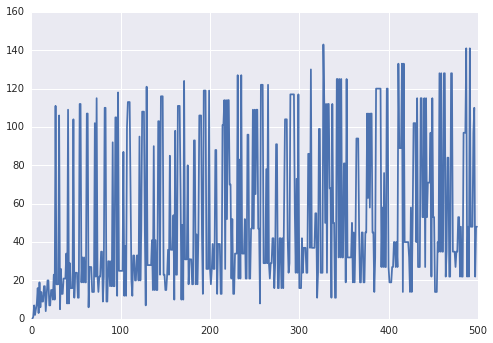

In [20]:
ns = np.arange(1,500)
collatzed = [collatz(n) for n in ns]
plt.plot(ns, collatzed)

If you hit SHIFT-ENTER on the above, you should see a plot. 

It looks pretty noisy; perhaps there is some periodic structure. We can use the FFT to look at this. np.fft.fft() computes the [http://en.wikipedia.org/wiki/Fourier_transform](Fourier transform); we can compute the magnitude spectrum $|f(x)|$ by taking the absolute value, and discarding the symmetric half:

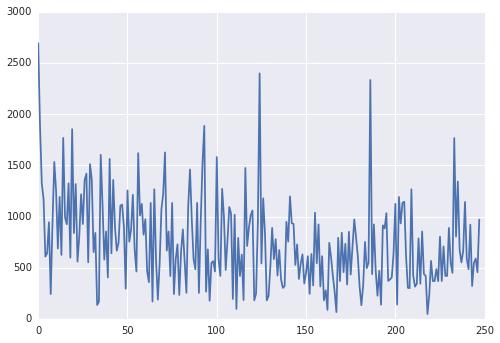

In [21]:
fftd = np.fft.fft(collatzed)
real_magnitude = np.abs(fftd)[1:len(fftd)/2]
fig = plt.figure() # make a new figure
ax = fig.add_subplot(111)
ax.plot(real_magnitude)

That looks pretty flat. Let's try more numbers, and make the fft plot a function we can reuse later.

In [11]:
ns = np.arange(1,10000)
collatzed = [collatz(n) for n in ns]


In [22]:
def fft_plot(x):
    """Plot the magnitude spectrum of x, showing only the real, positive-frequency 
    portion, and excluding component 0 (DC). """
    fftd = np.fft.fft(x)
    real_magnitude = np.abs(fftd)[1:len(fftd)/2] # note: 0th element is DC, which we ignore
    fig = plt.figure() # make a new figure
    ax = fig.add_subplot(111)
    ax.plot(real_magnitude)

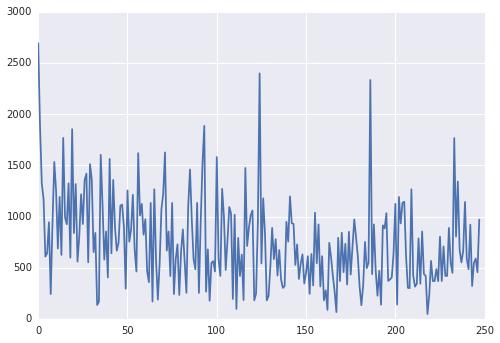

In [23]:
fft_plot(collatzed)

Some interesting structure, with big spikes, but the frequency approach isn't revealing much. Let's investigate the distribution of the variable. We can get a histogram with `plt.hist()`.

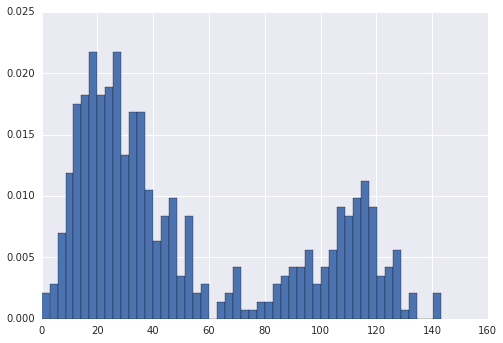

In [24]:
# normed forces the frequency axis to sum to 1
plt.hist(collatzed, bins=50, normed=True);

OK, this is more interesting. Let's show a normal fit to the distribution, using maximum likelihood estimation. `scipy.stats` has the tools we need to do this.

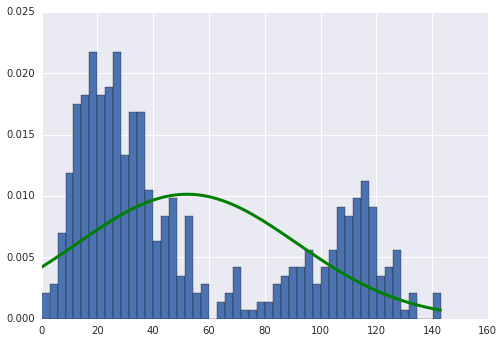

In [25]:
mean, std = np.mean(collatzed), np.std(collatzed)
import scipy.stats as stats # we must import scipy.stats, as we've not used it yet

# np.linspace() linearly spaces points on a range: here 200 points spanning the distribution
pdf_range = np.linspace(np.min(collatzed), np.max(collatzed), 200)

# scipy.stats has many distribution functions, including normal (norm)
pdf = stats.norm.pdf(pdf_range, mean, std)
plt.hist(collatzed, bins=50, normed=True)
plt.plot(pdf_range, pdf, 'g', linewidth=3) # plot using thick green line 

Obviously, this distribution is non-Gaussian, but let's test to make sure. `scipy.stats` provides many statistical tools, including normality testing. `scipy.stats.normaltest` gives us a combination of D’Agostino and Pearson’s test.

Note: to see the documentation for `normaltest`, try clicking at the end of `normaltest` and press SHIFT-TAB to see the tooltip. Hit the ^ symbol to bring up the full help in a pane below. This works for any function.


In [17]:
import scipy.stats as stats # we must import scipy.stats as we've not used it yet
k2, p = stats.normaltest(collatzed)
print p # p-value, testing if the distribution differs from the normal. p<0.05 suggests it is

1.05853773412e-263


We can safely assume this distribution is non-Gaussian. 

As an additional measure, we can plot a [Q-Q plot](http://en.wikipedia.org/wiki/Q%E2%80%93Q_plot), showing the quantiles of the `collatzed` distribution against the quantiles of a normal distribution.  If the distribution is normal, the plot would be show as a straight line.

The Q-Q plot is a very useful way of eyeballing distribution fits.

`scipy.stats.probplot()` does the job easily:

((array([-2.99148779, -2.70949569, -2.55092824, -2.43849088, -2.35038866,
         -2.27745777, -2.21494281, -2.16004641, -2.11097846, -2.06652166,
         -2.02580925, -1.98820138, -1.95321175, -1.92046179, -1.88965077,
         -1.86053573, -1.83291741, -1.8066303 , -1.7815354 , -1.75751472,
         -1.73446731, -1.71230602, -1.69095513, -1.67034836, -1.65042742,
         -1.63114071, -1.61244233, -1.5942913 , -1.57665082, -1.55948776,
         -1.54277217, -1.52647685, -1.51057708, -1.49505026, -1.47987574,
         -1.46503453, -1.45050917, -1.43628356, -1.42234281, -1.40867313,
         -1.39526172, -1.38209668, -1.36916692, -1.35646209, -1.34397251,
         -1.33168913, -1.31960346, -1.30770751, -1.2959938 , -1.28445526,
         -1.27308524, -1.26187747, -1.250826  , -1.23992522, -1.22916982,
         -1.21855477, -1.20807526, -1.19772678, -1.187505  , -1.17740581,
         -1.1674253 , -1.15755974, -1.14780558, -1.13815942, -1.12861802,
         -1.11917828, -1.10983722, -1.

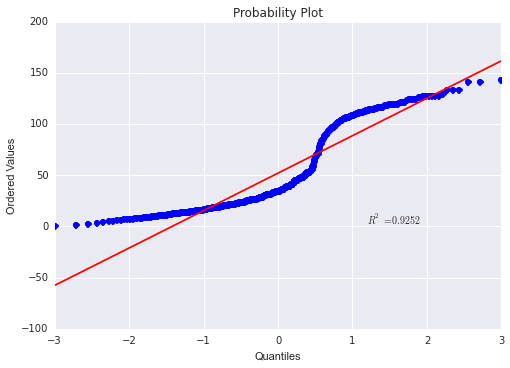

In [26]:
plt.figure() # don't plot on the same axis as the previous plot
stats.probplot(collatzed, dist="norm", plot=pylab) # note the use of "norm" to specify the test distribution

The "wobbliness" of the line indicates that this is not a good distribution match.